## Exercise(1) Apply PCA algorithm

In [2]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print('... loading data')
with open('mnist.pkl', 'rb') as f:
    train_set, valid_set, test_set = pickle.load(f, encoding='latin1')

... loading data


In [3]:
train_x, train_y = train_set
test_x, test_y = test_set

train_x = pd.DataFrame(train_x)
train_y = pd.DataFrame(train_y, columns=['label'])
test_x = pd.DataFrame(test_x)
test_y = pd.DataFrame(test_y, columns=['label'])

In [5]:
from sklearn.decomposition import PCA

# YOUR CODE STARTS HERE to get PCA_train_x and PCA_test_x

In [6]:
print('PCA_train_x shape: ', PCA_train_x.shape)
print('PCA_test_x shape: ', PCA_test_x.shape)

PCA shape:  (50000, 2) (10000, 2)


Text(0, 0.5, 'Principal Component 2')

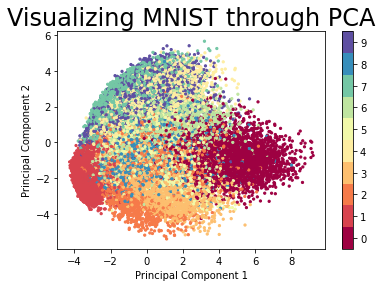

In [7]:
## Plot on the graph
# YOUR CODE STARTS HERE
# plt.scatter(...)
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))

plt.title('Visualizing MNIST through PCA', fontsize=24);
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

#### Let's use part of train_x data

In [8]:
# YOUR CODE STARTS HERE
# sub_PCA_train_x = ...
print('sub_PCA_train_x.shape: ', sub_PCA_train_x.shape)

sub_PCA_train_x.shape:  (1000, 2)


In [9]:
# YOUR CODE STARTS HERE
# sub_PCA_test_x = ...
print('sub_PCA_test_x.shape: ', sub_PCA_test_x.shape)

sub_PCA_test_x.shape:  (100, 2)


## Exercise(2) - Hierarchical Clustering

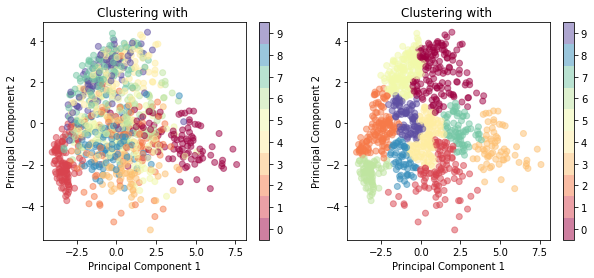

In [11]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

# YOUR CODE STARTS HERE
# hier = ...

## Plot 
plt.scatter(sub_PCA_train_x[:, 0], sub_PCA_train_x[:, 1], c=train_y['label'][:1000], cmap='Spectral', alpha=0.5)
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title("Clustering with ")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

----
## Exercise(3) k-means scratch
### Step(1) Normalize data

In [12]:
a = np.array([1, 3, 4])
A = np.tile(a, (3,1))
A

array([[1, 3, 4],
       [1, 3, 4],
       [1, 3, 4]])

two popular normalization methods
* min-max normalization
* mean-std normalization

In [13]:
def apply_normalizer(dataset, offset, divisor):
    dataset_normalized = np.zeros(dataset.shape)
    N = dataset.shape[0]
    # YOUR CODE STARTS HERE
    # dataset_normalized = ...
    # dataset_normalized = ...

    return dataset_normalized


def normalize_minmax(dataset):
    # YOUR CODE STARTS HERE
    # minval = dataset.min(0)
    # maxval = dataset.max(0)
    
    # dataset_normalized = ...

    return dataset_normalized, minval, maxval-minval


def normalize_meanstd(dataset):
    # YOUR CODE STARTS HERE
    # meanval = ...
    # stdval = ...

    # dataset_normalized = ...

    return dataset_normalized, meanval, stdval

In [14]:
normalized_PCA_train_x, off, div = normalize_minmax(sub_PCA_train_x)
print("Original data: ", sub_PCA_train_x[0], '\nNormalized data: ', normalized_PCA_train_x[0])
print("offset:", off, ";  divisor:", div, '\n')

normalized_PCA_train_x, off, div = normalize_meanstd(sub_PCA_train_x)
print("Original data: ", sub_PCA_train_x[0], '\nNormalized data: ', normalized_PCA_train_x[0])
print("offset:", off, ";  divisor:", div)

Original data:  [ 0.46149734 -1.246836  ] 
Normalized data:  [0.38819504 0.40918228]
offset: [-4.0606427 -5.1656036] ;  divisor: [11.649144  9.577071] 

Original data:  [ 0.46149734 -1.246836  ] 
Normalized data:  [ 0.24438068 -0.6387344 ]
offset: [-0.07587955 -0.00492903] ;  divisor: [2.1989336 1.9443244]


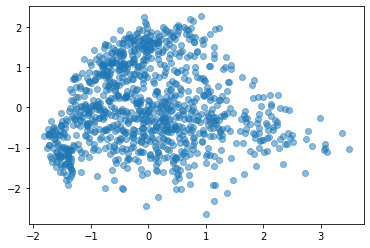

In [15]:
plt.scatter(normalized_PCA_train_x[:, 0], normalized_PCA_train_x[:, 1], cmap='Spectral', alpha=0.5)

**Q1: In the normalization methods, what is the meaning of offset and divisor, respectively?**

**Q2: After normalization, how does the data range change?**

Hint: Try np.mean(X_normalized, axis=0), np.std(X_normalized, axis=0), np.min(X_normalized, axis=0), np.max(X_normalized, axis=0), np.median(X_normalized, axis=0).

In [16]:
# a distance function
def Euclidean_distance(vecA, vecB):
    # YOUR CODE STARTS HERE
    

### Step(2). Initialize centroids

In [17]:
k = int(input("How many cluster do you want? "))
print(k)

How many cluster do you want? 4
4


In [18]:
import random

def init_centroids_random(dataset, k):
    """
    Arguments:
    dataset -- Numpy array of PCA applied data
    k -- the number of clusters
    """
    # YOUR CODE STARTS HERE
    # init_centroids = ...
    
    # for ...
    return centroids

In [19]:
def init_centroids_index(dataset, k):
    """
    Arguments:
    dataset -- Numpy array of PCA applied data
    k -- the number of clusters
    """
    # YOUR CODE STARTS HERE
    for i in range(k):  # first k instances become the initial centroids
        # ...
        
    return centroids

In [20]:
# initialize_centroids(centroids, sub_PCA_train_x)
centroids = init_centroids_random(sub_PCA_train_x, k)

In [21]:
## Change centroids value to dataframe. 
# cet_df = ...
# cet_df.columns ...
cet_df.head()

,X,Y
0,-0.742962,-1.964183
1,-3.213105,-2.700066
2,2.835259,-0.415431
3,0.543251,0.283643


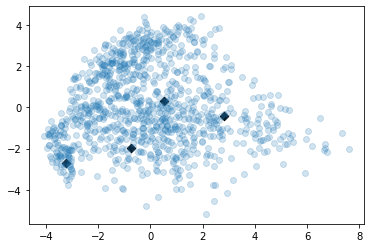

In [23]:
## Plot random centroids on the dataset

# YOUR CODE STARTS HERE
# ...

### Step(3). (Re)assigning every datas to its _closest centroid_

In [24]:
def re_assign_data(dataset, centroids):
    """
    Arguments:
    dataset -- Numpy array of PCA applied data
    centroids -- A dictionary of centroids
    """
    
    # (Re)assigning every instance to its closest centroid
    for row in dataset:
        ## YOUR CODE STARTS HERE
        # Calculate euclidean distance between each centroid and each data.
        # distances_to_centroids = ...
        
        # Find the centroid with a minimum distance 
        # membership = ...
        # ...
        
    return memberships

### Step(4). Recalculate average of each cluster and calculate SSE value

In [25]:
def re_calc_avg_sse(centroids, memberships):
    """
    Arguments:
    centroids -- A dictionary of centroids
    memberships -- A dictionary data which is clustered by key(key: clustered group, value: values of that group)
    """
    
    # Re-calculate the average of each cluster and calculate SSE.
    for membership in cluster_memberships:
        ## YOUR CODE STARTS HERE
        # centroids[membership] = ...

        for row in cluster_memberships[membership]:
            # curr_sse += ...
    
    return centroids, curr_sse            

### Step(5). Iterate STEP3 and STEP4 until SSE is less than ‘tol’ value 


In [26]:
## k-Means algorithm
def kmeans(dataset, k, max_iter = 300, tol = 0.001):
  
    ## YOUR CODE STARTS HERE
    # ...
    
    ## 1. Initiate SSE which is key metric in k-means clustering (sse = sum of squared error) into 'np.inf'
    curr_sse = np.inf

    ## 2. Clustering
    for i in range(max_iter):

        ## (Re)Aassign datas to its closest centroids
        # ...

        prev_sse = curr_sse
        ## Re-calculate the average of each cluster and calculate SSE.
        #  ...

        ## Plot center points
        plt.figure(i)
        c_df = pd.DataFrame(centroids).transpose()
        plt.scatter(c_df.loc[:, 0], c_df.loc[:, 1], color='black', marker='x')

        ## Plot assigned data
        for key in cluster_memberships:
            plt.scatter(*zip(*cluster_memberships[key]), alpha=0.2)
            plt.title('k={} '.format(k) + ' SSE=' + str(curr_sse))

        plt.show()
        print('iteration#{} | prev_sse= {:.4f};  curr_sse= {:.4f}'.format(i, prev_sse, curr_sse))

        # Terminal Condition
        if (prev_sse - curr_sse) / curr_sse < tol:
            break

    return cluster_memberships, curr_sse

**Q3: Before the iterations, how are the centroids defined?**

**Q4: One metric to evaluate the clustering results is sum of squared error (SSE). Describe the meaning of SSE in terms of the relationship between data and centroids**

**Q5: What is the terminal condition? Describe it with `tol` and `max_iter`.**

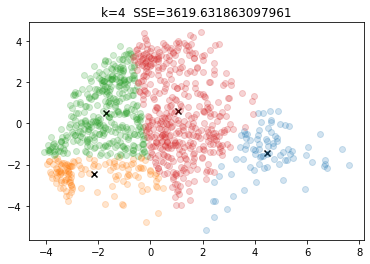

iteration#0 | prev_sse= inf;  curr_sse= 3619.6319


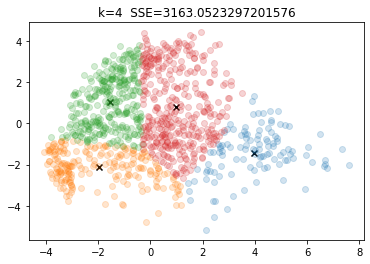

iteration#1 | prev_sse= 3619.6319;  curr_sse= 3163.0523


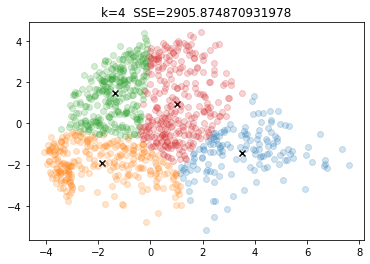

iteration#2 | prev_sse= 3163.0523;  curr_sse= 2905.8749


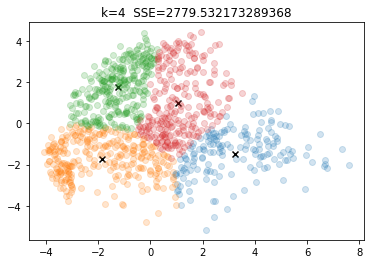

iteration#3 | prev_sse= 2905.8749;  curr_sse= 2779.5322


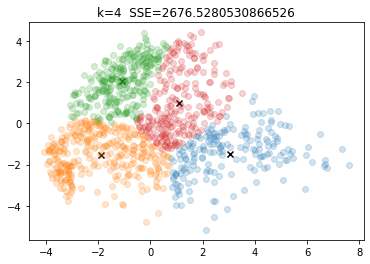

iteration#4 | prev_sse= 2779.5322;  curr_sse= 2676.5281


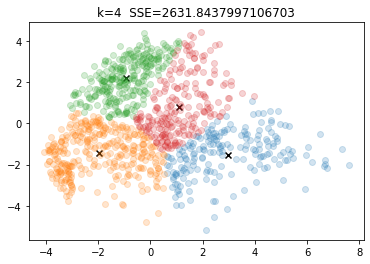

iteration#5 | prev_sse= 2676.5281;  curr_sse= 2631.8438


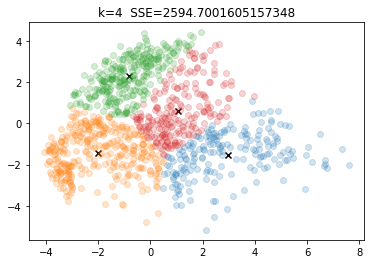

iteration#6 | prev_sse= 2631.8438;  curr_sse= 2594.7002


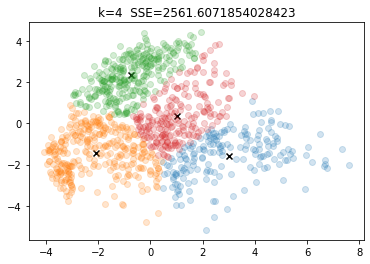

iteration#7 | prev_sse= 2594.7002;  curr_sse= 2561.6072


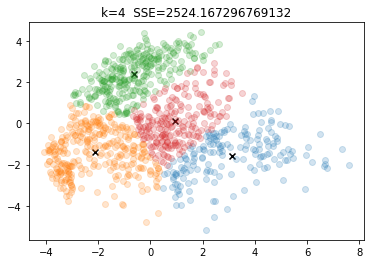

iteration#8 | prev_sse= 2561.6072;  curr_sse= 2524.1673


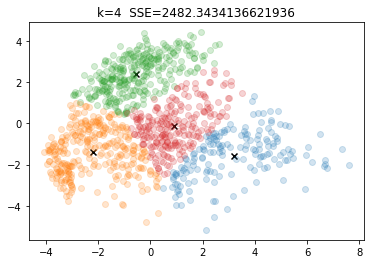

iteration#9 | prev_sse= 2524.1673;  curr_sse= 2482.3434


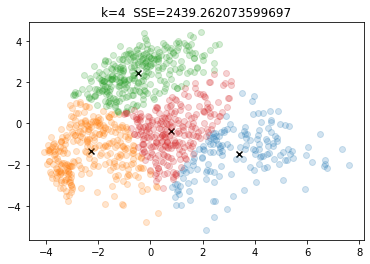

iteration#10 | prev_sse= 2482.3434;  curr_sse= 2439.2621


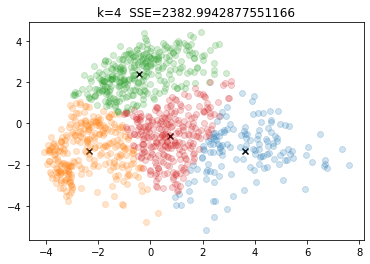

iteration#11 | prev_sse= 2439.2621;  curr_sse= 2382.9943


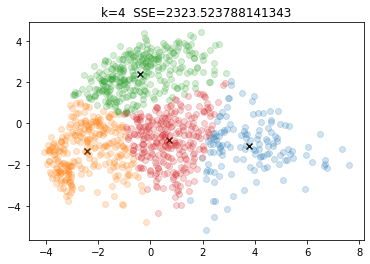

iteration#12 | prev_sse= 2382.9943;  curr_sse= 2323.5238


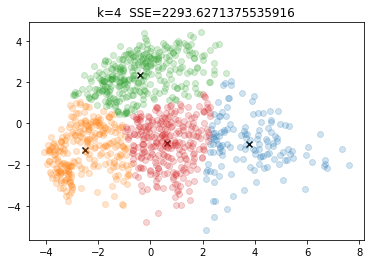

iteration#13 | prev_sse= 2323.5238;  curr_sse= 2293.6271


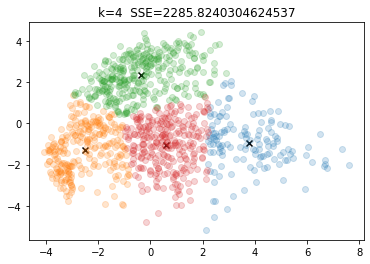

iteration#14 | prev_sse= 2293.6271;  curr_sse= 2285.8240


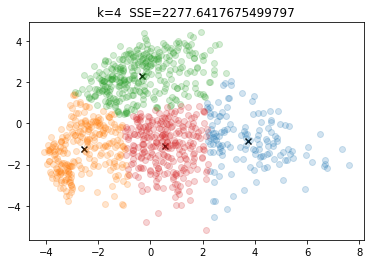

iteration#15 | prev_sse= 2285.8240;  curr_sse= 2277.6418


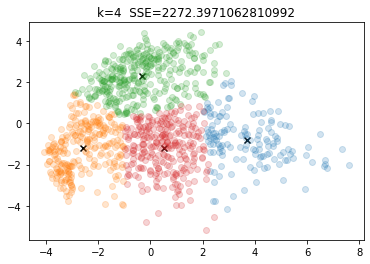

iteration#16 | prev_sse= 2277.6418;  curr_sse= 2272.3971


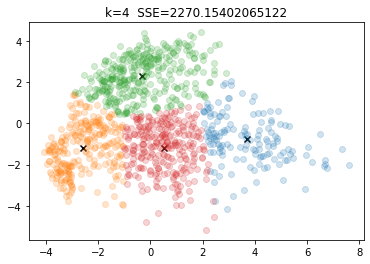

iteration#17 | prev_sse= 2272.3971;  curr_sse= 2270.1540


In [27]:
# cluster_memberships, curr_sse = ...

----
### Step(6) Using sklearn library
- ___KMeans(n_clusters=)___ 

In [28]:
from sklearn.cluster import KMeans

## YOUR CODE STARTS HERE
# model = ...
# ...

# result = ...

- Check ___crosstab___

In [29]:
import pandas as pd

# df = ...
# ct = ...
ct

result,0,1,2,3
labels,,,,
0,17,821,140,2
1,0,0,6,1129
2,81,142,613,196
3,31,90,729,160
4,882,11,5,84
5,148,149,446,149
6,248,251,366,93
7,854,3,17,154
8,139,107,550,178
